In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.datasets import load_iris

iris = load_iris()

In [5]:
import pandas as pd

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris_df['target'] = iris.target

print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

In [9]:
from sklearn.datasets import fetch_openml

In [11]:
shuttle_data = fetch_openml(name='shuttle', version=1, as_frame=True)

print("Shape of data:", shuttle_data['data'].shape)
print("Shape of target:", shuttle_data['target'].shape)

c:\Users\raidb\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Shape of data: (58000, 9)
Shape of target: (58000,)


In [12]:
print("Shape of data:", shuttle_data['data'])

Shape of data:          A1    A2     A3   A4    A5    A6    A7     A8     A9
0      50.0  21.0   77.0  0.0  28.0   0.0  27.0   48.0   22.0
1      55.0   0.0   92.0  0.0   0.0  26.0  36.0   92.0   56.0
2      53.0   0.0   82.0  0.0  52.0  -5.0  29.0   30.0    2.0
3      37.0   0.0   76.0  0.0  28.0  18.0  40.0   48.0    8.0
4      37.0   0.0   79.0  0.0  34.0 -26.0  43.0   46.0    2.0
...     ...   ...    ...  ...   ...   ...   ...    ...    ...
57995  80.0   0.0   84.0  0.0 -36.0 -29.0   4.0  120.0  116.0
57996  55.0   0.0   81.0  0.0 -20.0  25.0  26.0  102.0   76.0
57997  55.0   0.0   77.0  0.0  12.0 -22.0  22.0   65.0   42.0
57998  37.0   0.0  103.0  0.0  18.0 -16.0  66.0   85.0   20.0
57999  56.0   2.0   98.0  0.0  52.0   1.0  42.0   46.0    4.0

[58000 rows x 9 columns]


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(shuttle_data['data'])

In [15]:
pca = PCA()

In [16]:
pca.fit(data_scaled)

PCA()

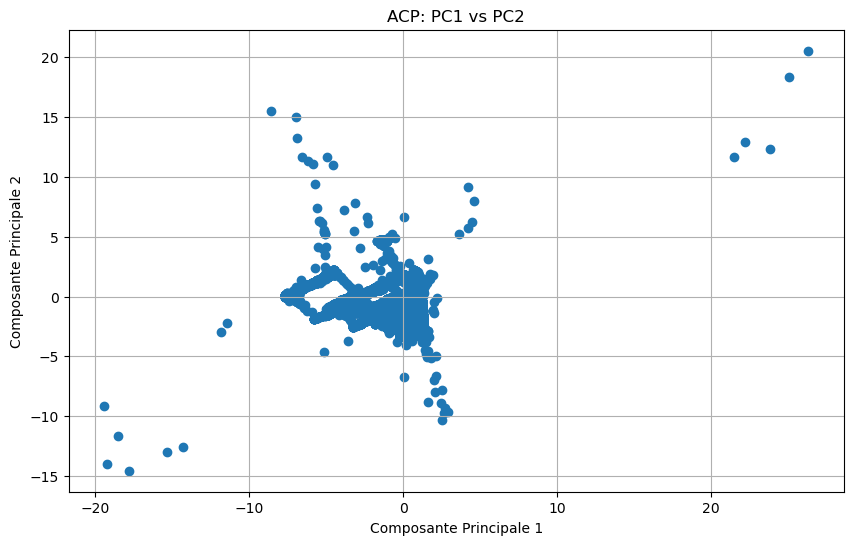

In [17]:
n_components = 5

pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(data_scaled)

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2' , 'PC3' , 'PC4' , 'PC5']) 

plt.figure(figsize=(10, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'])
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('ACP: PC1 vs PC2')
plt.grid(True)
plt.show()

In [18]:
inertie_cumulee = np.cumsum(pca.explained_variance_ratio_)
print("Inertie cumulée des trois premières composantes principales :", inertie_cumulee)

Inertie cumulée des trois premières composantes principales : [0.34653448 0.52486583 0.67036785 0.78753411 0.89722381]


In [26]:
from sklearn.cluster import KMeans
import os

# Set the number of clusters explicitly
n_clusters = 3

# Set the environment variable to avoid the warning about the number of physical cores
os.environ['LOKY_MAX_CPU_COUNT'] = '4'  # Set the number of cores you want to use, e.g., 4

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, n_init=10)  # Explicitly set n_init to avoid future warning
kmeans.fit(data_scaled)

# Check the cluster labels
print(kmeans.labels_)

[0 1 0 ... 1 2 2]
